In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
from typing import DefaultDict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
# load the results

#results_file = open('../results/meta_perf_vs_num_train_fixed_5trials.pkl', 'rb')
results_file = open('../results/meta_perf_vs_num_train_fixed_50trials.pkl', 'rb')
all_results = pickle.load(results_file)
results_file.close()

In [4]:
# (num_trials is just used to verify all evaluations succeeded)
num_trials = 50
metric = "perc_diff_from_best_global"
models = ['xgboost', 'random', 'knn', 'linear']

In [5]:
results_per_model = {model: DefaultDict(list) for model in models}
for dataset in all_results:
    for trial in all_results[dataset]:
        num_train = all_results[dataset][trial]['num_train']
        for model in all_results[dataset][trial]:
            if model == 'num_train': continue
            for n_train, perf in zip(num_train, all_results[dataset][trial][model]):
                results_per_model[model][n_train].append(perf[metric])

In [6]:
means = {}
p1s = {}
p3s = {}
for model in models:
    means[model] = []
    p1s[model] = []
    p3s[model] = []
    for n_train in range(2, 20, 2):
        assert len(results_per_model[model][n_train]) == 19 * num_trials
        means[model].append(np.mean(results_per_model[model][n_train]))
        p1s[model].append(np.percentile(results_per_model[model][n_train], 40))
        p3s[model].append(np.percentile(results_per_model[model][n_train], 60))

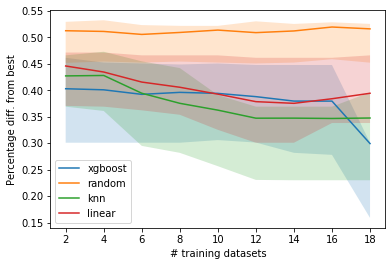

In [7]:
# plot with fill between 40-60% of trials
x = [i for i in range(2, 20, 2)]

for i,model in enumerate(models):

    plt.plot(x, means[model], label = model)
    plt.fill_between(x, p1s[model], p3s[model], alpha=0.2)
plt.legend()
plt.xlabel('# training datasets')
plt.ylabel('Percentage diff. from best')

plt.savefig('saved_plots/perf_vs_datasets_plot.png', dpi=160)
plt.show()

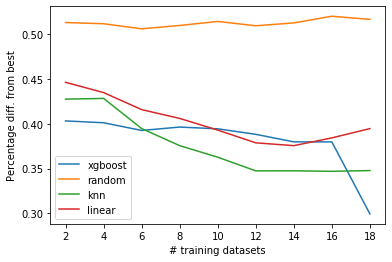

In [8]:
# old plot, with no error bars

x = [i for i in range(2, 20, 2)]

for model in models:
    y = means[model]
    plt.plot(x, y, label = model)
plt.legend()
plt.xlabel('# training datasets')
plt.ylabel('Percentage diff. from best')

plt.savefig('saved_plots/perf_vs_datasets_plot.png', dpi=160)
plt.show()